<a href="https://colab.research.google.com/github/sindhuvahinis/BGSA-RS/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import statements


In [3]:
import matplotlib.pyplot as plt
import numpy as np

1. a) Generate training data (xi,yi) for i = 1...8 by xi ∼Uniform([0,1]), and yi = f (xi)+εi, where f(x) = 1+2x−2x^2 and εi ∼N(0,σ^2) and σ = 0.1. Plot the training data and the function f

In [4]:
x_train = np.linspace(0, 1, 8)
sigma = 0.1

y_train = []
f = []
for i in x_train:
  fxi = 1 + (2 * i) + (2 * i * i)
  f.append(fxi)
  e = i * sigma
  y_train.append(fxi+e)

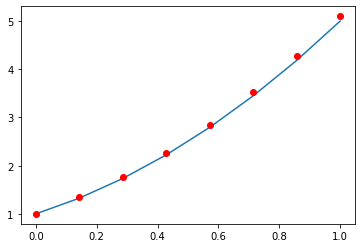

In [61]:
  plt.plot(x_train, f);
  plt.plot(x_train, y_train, 'o', color='red');
  plt.show()

b) In this problem, you will find the best fit degree d polynomial for the above data for each d between 0 and 7. 

Find it with least squares linear regression by minimizing the training mean squared error (MSE) using the Normal Equations. 

Use numpy.linalg.solve to solve the Normal Equations instead of computing a matrix inverse. 

On 8 separate plots, plot the data and the best fit degree-d polynomial.

In [6]:
def getXMatrix(x_train, d):

  x_matrix = []
  for x in x_train:
    x_row = []
    for i in range(0,d+1):
      x_row.append(x**i)

    x_matrix.append(x_row)
  
  return x_matrix

In [7]:
#Testing
print(x_train)
print(getXMatrix(x_train=x_train, d=0))
print(getXMatrix(x_train=x_train, d=1))
print(getXMatrix(x_train=x_train, d=2))
print(getXMatrix(x_train=x_train, d=3))
print(getXMatrix(x_train=x_train, d=4))
print(getXMatrix(x_train=x_train, d=5))
print(getXMatrix(x_train=x_train, d=6))
print(getXMatrix(x_train=x_train, d=7))

[0.         0.14285714 0.28571429 0.42857143 0.57142857 0.71428571
 0.85714286 1.        ]
[[1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0]]
[[1.0, 0.0], [1.0, 0.14285714285714285], [1.0, 0.2857142857142857], [1.0, 0.42857142857142855], [1.0, 0.5714285714285714], [1.0, 0.7142857142857142], [1.0, 0.8571428571428571], [1.0, 1.0]]
[[1.0, 0.0, 0.0], [1.0, 0.14285714285714285, 0.02040816326530612], [1.0, 0.2857142857142857, 0.08163265306122448], [1.0, 0.42857142857142855, 0.18367346938775508], [1.0, 0.5714285714285714, 0.32653061224489793], [1.0, 0.7142857142857142, 0.510204081632653], [1.0, 0.8571428571428571, 0.7346938775510203], [1.0, 1.0, 1.0]]
[[1.0, 0.0, 0.0, 0.0], [1.0, 0.14285714285714285, 0.02040816326530612, 0.0029154518950437313], [1.0, 0.2857142857142857, 0.08163265306122448, 0.02332361516034985], [1.0, 0.42857142857142855, 0.18367346938775508, 0.07871720116618075], [1.0, 0.5714285714285714, 0.32653061224489793, 0.1865889212827988], [1.0, 0.7142857142857142, 0.51020408163

In [68]:
def plotData(x_train, d, theta):

  y_matrix = []
  for x in x_train:
    y_val = 0
    for i in range(0,d+1):
      y_val += (theta[i] * x**i)

    y_matrix.append(y_val)
  
  index = 0 if d < 4 else 1
  plt.title(f"d = {d} ")
  plt.scatter(x_train, y_train)
  plt.plot(x_train, y_matrix);
  plt.show()

  # subplt[index, d%4].set_title(f"d = {d} ")
  # subplt[index, d%4].scatter(x_train, y_train)
  # subplt[index, d%4].plot(x_train, y_matrix);


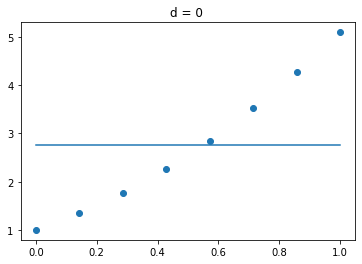

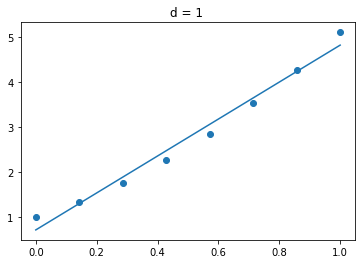

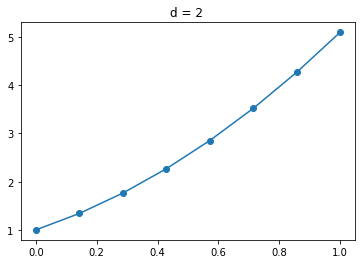

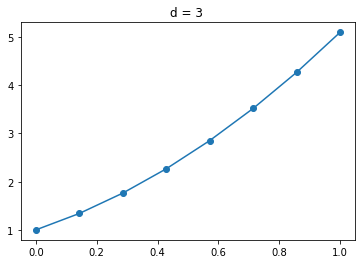

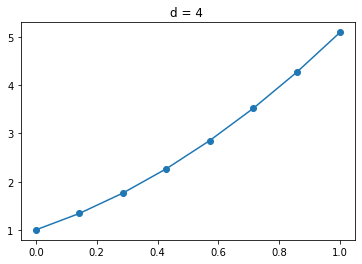

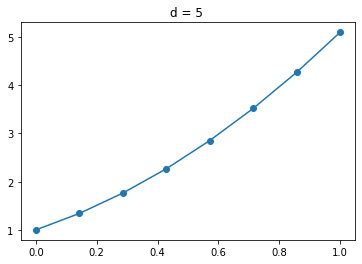

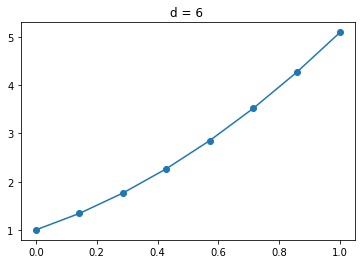

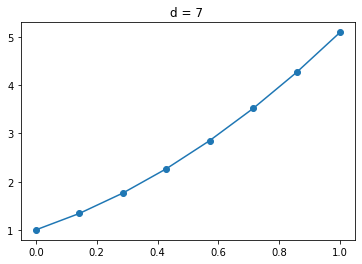

In [73]:
#fig, subplt = plt.subplots(2, 4)

theta_arr = []
for i in range(0, 8):
  x = getXMatrix(x_train=x_train, d=i)
  x_transpose = np.transpose(x)

  temp1 = x_transpose.dot(x)
  temp2 = x_transpose.dot(y_train)
  theta = np.linalg.solve(temp1, temp2)
  theta_arr.append(theta)

  plotData(x_train, i, theta)



(c) Plot the MSE with respect to the training data (training MSE) as a function of d. Which value of d provided the lowest training MSE?

In [71]:
def getMSE(d, theta):
  mse = 0
  for i in range(8):
    x, y = x_train[i], y_train[i]

    theta_x = 0
    for j in range(0,d+1):
      theta_x += (theta[j] * x**j)
    
    mse += (y - theta_x)**2
  
  mse *= 0.5
  return mse

[7.344227405247812, 0.13994169096209896, 5.848664055115158e-30, 5.7530763001153305e-28, 2.4561245913814423e-27, 5.617104290186911e-25, 2.972935340441198e-23, 5.019284747011579e-22]


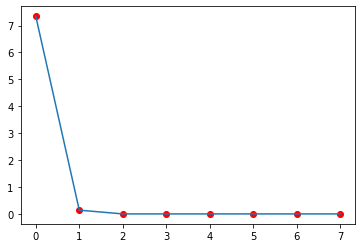

In [88]:
mse_arr = []
for i in range(8):
  mse_arr.append(getMSE(i, theta_arr[i]))

print(mse_arr)
plt.scatter([i for i in range(8)], mse_arr, color='red')
plt.plot([i for i in range(8)], mse_arr)


d) Generate a test set of 1000 data points sampled according to the same process as in part 
(a). Plot the MSE with respect to the test data (test MSE) as a function of d. Which value of d provided the lowest test MSE?